## Energy Efficiency

Following image represents the energy consumption in US buildings:

<img src='Pictures/Statistics.gif'/>

(Couresty: http://homepages.cae.wisc.edu/~ece539/fall13/project/Wysocki.pptx)

Heating, ventilation, and air conditioning(HVAC) contributes to higher % of energy consumption. In this study, we are focusing on accurately predicting the energy consumption (heating and colling load) of equipments to choose building shapes efficiently.

> i.e., this notebook demonstrates the how to effectively design the energy requirements for residential buildings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE

In [2]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
import xgboost
from sklearn.metrics import accuracy_score
from sklearn import model_selection

### Data Set Information

(Courtesy: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. 

### Load Dataset

In [4]:
energy = pd.read_excel('Dataset/data14.xlsx')
energy

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:<br/>
X1 Relative Compactness <br/>
X2 Surface Area<br/>
X3 Wall Area<br/>
X4 Roof Area<br/>
X5 Overall Height<br/>
X6 Orientation<br/>
X7 Glazing Area<br/>
X8 Glazing Area Distribution<br/>
Y1 Heating Load<br/>
Y2 Cooling Load<br/>

(Courtesy: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)

### Data cleaning and Data Analysis

Dimensions 

In [5]:
energy.shape

(768, 10)

Check for missing Values

In [6]:
energy.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

<b>There are No missing values.</b>

Renaming the column names of the Dataset

In [7]:
energy.columns= [
    'rel_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height','orientation', 
    'glazing_area', 'glazing_area_dist', 'heating_load', 'cooling_load'
]

In [8]:
energy

,rel_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### Finding correlation between features

We systematically investigate the association strength of each input variable with each of the output variables in order to identify the most strongly related input variables.

In [9]:
correlation = energy.corr()
correlation.round(decimals=4)

,rel_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist,heating_load,cooling_load
rel_compactness,1.0000,-0.9919,-0.2038,-0.8688,0.8277,0.0000,0.0000,0.0000,0.6223,0.6343
surface_area,-0.9919,1.0000,0.1955,0.8807,-0.8581,0.0000,0.0000,-0.0000,-0.6581,-0.6730
wall_area,-0.2038,0.1955,1.0000,-0.2923,0.2810,0.0000,-0.0000,0.0000,0.4557,0.4271
roof_area,-0.8688,0.8807,-0.2923,1.0000,-0.9725,0.0000,-0.0000,-0.0000,-0.8618,-0.8625
overall_height,0.8277,-0.8581,0.2810,-0.9725,1.0000,0.0000,0.0000,0.0000,0.8894,0.8958
orientation,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-0.0026,0.0143
glazing_area,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,1.0000,0.2130,0.2698,0.2075
glazing_area_dist,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.2130,1.0000,0.0874,0.0505
heating_load,0.6223,-0.6581,0.4557,-0.8618,0.8894,-0.0026,0.2698,0.0874,1.0000,0.9759
cooling_load,0.6343,-0.6730,0.4271,-0.8625,0.8958,0.0143,0.2075,0.0505,0.9759,1.0000


In [10]:
correlation.style.background_gradient(cmap='coolwarm').set_precision(4)

,rel_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist,heating_load,cooling_load
rel_compactness,1.0000,-0.9919,-0.2038,-0.8688,0.8277,0.0000,0.0000,0.0000,0.6223,0.6343
surface_area,-0.9919,1.0000,0.1955,0.8807,-0.8581,0.0000,0.0000,-0.0000,-0.6581,-0.6730
wall_area,-0.2038,0.1955,1.0000,-0.2923,0.2810,0.0000,-0.0000,0.0000,0.4557,0.4271
roof_area,-0.8688,0.8807,-0.2923,1.0000,-0.9725,0.0000,-0.0000,-0.0000,-0.8618,-0.8625
overall_height,0.8277,-0.8581,0.2810,-0.9725,1.0000,0.0000,0.0000,0.0000,0.8894,0.8958
orientation,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-0.0026,0.0143
glazing_area,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,1.0000,0.2130,0.2698,0.2075
glazing_area_dist,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.2130,1.0000,0.0874,0.0505
heating_load,0.6223,-0.6581,0.4557,-0.8618,0.8894,-0.0026,0.2698,0.0874,1.0000,0.9759
cooling_load,0.6343,-0.6730,0.4271,-0.8625,0.8958,0.0143,0.2075,0.0505,0.9759,1.0000


### Observations
As we can see from correlation matrix:
> 1. rel_compactness, wall_area and overall_height are highly positively correlated with heating and cooling load 
> 2. surface area and roof_area is highly negatively correlated with heating_load and cooling load.

Getting Features for Input (X) and Response (Y)

In [11]:
X = energy.drop(['heating_load', 'cooling_load'], axis=1)

In [12]:
X

,rel_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [13]:
Y = energy['heating_load']

In [14]:
Y

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: heating_load, Length: 768, dtype: float64

### Model Building (for Y='Heating Load') using RFE

#### Build a model to predict the Heating Load of Heating equipment.

Feature Selection and Model Building

> ExtraTreesRegressor() and RandomForestRegression() perform with almost same efficiency. 
>(Courtesy: https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/)

In [15]:
model = ExtraTreesRegressor()

#### ABOUT RFE

Feature ranking with recursive feature elimination.

>This technique begins by building a model on the entire set of predictors and computing an importance score for each predictor. The least important predictor(s) are then removed, the model is re-built, and importance scores are computed again. In practice, the analyst specifies the number of predictor subsets to evaluate as well as each subset’s size. Therefore, the subset size is a tuning parameter for RFE. The subset size that optimizes the performance criteria is used to select the predictors based on the importance rankings. The optimal subset is then used to train the final model.

(Courtesy: https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15)

For syntax of RFE: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [16]:
rfe = RFE(estimator=model, n_features_to_select=3, step=1)

In [17]:
rfe

RFE(estimator=ExtraTreesRegressor(), n_features_to_select=3)

In [18]:
fit = rfe.fit(X, Y)

In [19]:
print('Number of Features: ', fit.n_features_)

Number of Features:  3


In [20]:
# Selected Features
fit.support_

array([False,  True, False,  True,  True, False, False, False])

In [21]:
selected_features = [each_feature for each_feature, status in zip(X.columns, fit.support_) if status == True]
print('Selected Features:\n', *selected_features, sep="\n")

Selected Features:

surface_area
roof_area
overall_height


In [22]:
for feature, value in zip(X.columns, fit.ranking_):
    print(feature, "--- (", value, ")")

rel_compactness --- ( 4 )
surface_area --- ( 1 )
wall_area --- ( 3 )
roof_area --- ( 1 )
overall_height --- ( 1 )
orientation --- ( 6 )
glazing_area --- ( 2 )
glazing_area_dist --- ( 5 )


### Plotting Importance of Features

In [23]:
imp_values = list(fit.estimator_.feature_importances_)
imp_values

[0.16252949215379572, 0.5936115369509658, 0.24385897089523856]

In [24]:
imp_values.reverse()
imp_values

[0.24385897089523856, 0.5936115369509658, 0.16252949215379572]

In [25]:
importance = []
for value in fit.support_:
    if value == True:
        importance.append(imp_values.pop())
    else:
        importance.append(0)

importance 

[0, 0.16252949215379572, 0, 0.5936115369509658, 0.24385897089523856, 0, 0, 0]

In [26]:
plotting_data = pd.DataFrame({'Features': X.columns, 'Importance':importance}, index=X.columns)
plotting_data

,Features,Importance
rel_compactness,rel_compactness,0.000000
surface_area,surface_area,0.162529
wall_area,wall_area,0.000000
roof_area,roof_area,0.593612
overall_height,overall_height,0.243859
orientation,orientation,0.000000
glazing_area,glazing_area,0.000000
glazing_area_dist,glazing_area_dist,0.000000


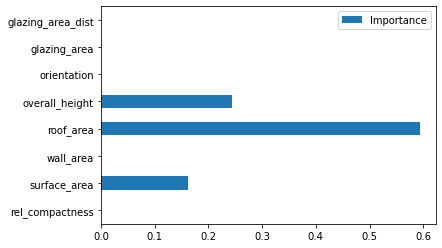

In [27]:
plotting_data.plot.barh()

### Fit the Model

In [28]:
seed = 7  # Can be any value. Keep it same to repoduce the same results

In [29]:
n_estimators = len(X)

In [30]:
model.fit(X, Y)

ExtraTreesRegressor()

### Evaluate the Model

>Repeated k-fold cross-validation provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.

(Courtesy: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/)

In [31]:
kfold = model_selection.RepeatedKFold(n_splits=n_estimators, n_repeats=10, random_state=seed)

In [32]:
cv_results = model_selection.cross_val_score(model, X, Y, cv=10)

In [33]:
cv_results

array([0.72206534, 0.99839525, 0.99619544, 0.99497013, 0.9966615 ,
       0.99688694, 0.99784014, 0.99632613, 0.99545147, 0.99569401])

In [34]:
msg = "%s: %f (%f)" % ("ExtraTreesRegressor", cv_results.mean(), cv_results.std())

In [35]:
msg

'ExtraTreesRegressor: 0.969049 (0.082334)'

### Model Building (for Y='Cooling Load')

>The main issue of RFE is that it can be expensive to run. 

Removing correlated features are beneficial as the highly correlated features in the dataset provide the same information 

(Courtesy: https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15)

In [36]:
data = energy.drop(['heating_load', 'cooling_load'], axis=1)
data

,rel_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [37]:
correlation_matrix = data.corr()
correlation_matrix.round(decimals=4)

,rel_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist
rel_compactness,1.0000,-0.9919,-0.2038,-0.8688,0.8277,0.0,0.000,0.000
surface_area,-0.9919,1.0000,0.1955,0.8807,-0.8581,0.0,0.000,-0.000
wall_area,-0.2038,0.1955,1.0000,-0.2923,0.2810,0.0,-0.000,0.000
roof_area,-0.8688,0.8807,-0.2923,1.0000,-0.9725,0.0,-0.000,-0.000
overall_height,0.8277,-0.8581,0.2810,-0.9725,1.0000,0.0,0.000,0.000
orientation,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.000,0.000
glazing_area,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0,1.000,0.213
glazing_area_dist,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0,0.213,1.000


In [38]:
correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)

,rel_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist
rel_compactness,1.0000,-0.9919,-0.2038,-0.8688,0.8277,0.0000,0.0000,0.0000
surface_area,-0.9919,1.0000,0.1955,0.8807,-0.8581,0.0000,0.0000,-0.0000
wall_area,-0.2038,0.1955,1.0000,-0.2923,0.2810,0.0000,-0.0000,0.0000
roof_area,-0.8688,0.8807,-0.2923,1.0000,-0.9725,0.0000,-0.0000,-0.0000
overall_height,0.8277,-0.8581,0.2810,-0.9725,1.0000,0.0000,0.0000,0.0000
orientation,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
glazing_area,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,1.0000,0.2130
glazing_area_dist,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.2130,1.0000


Omitting highly correlated features

In [39]:
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features.add('heating_load')
            
print("Highly Correlated Features: ", correlated_features)

Highly Correlated Features:  {'roof_area', 'heating_load', 'surface_area', 'overall_height'}


Get new Input and Target data

In [40]:
req_data = energy.drop(list(correlated_features), axis=1)
req_data

,rel_compactness,wall_area,orientation,glazing_area,glazing_area_dist,cooling_load
0,0.98,294.0,2,0.0,0,21.33
1,0.98,294.0,3,0.0,0,21.33
2,0.98,294.0,4,0.0,0,21.33
3,0.98,294.0,5,0.0,0,21.33
4,0.90,318.5,2,0.0,0,28.28
...,...,...,...,...,...,...
763,0.64,343.0,5,0.4,5,21.40
764,0.62,367.5,2,0.4,5,16.88
765,0.62,367.5,3,0.4,5,17.11
766,0.62,367.5,4,0.4,5,16.61


In [41]:
X = req_data.drop(['cooling_load'], axis=1)
target = req_data['cooling_load']

In [42]:
X

,rel_compactness,wall_area,orientation,glazing_area,glazing_area_dist
0,0.98,294.0,2,0.0,0
1,0.98,294.0,3,0.0,0
2,0.98,294.0,4,0.0,0
3,0.98,294.0,5,0.0,0
4,0.90,318.5,2,0.0,0
...,...,...,...,...,...
763,0.64,343.0,5,0.4,5
764,0.62,367.5,2,0.4,5
765,0.62,367.5,3,0.4,5
766,0.62,367.5,4,0.4,5


In [43]:
target

0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: cooling_load, Length: 768, dtype: float64


#### Build a model to predict the Cooling Load of Heating equipment.

Feature Selection and Model Building

In [44]:
model = ExtraTreesRegressor()

In [45]:
from sklearn.feature_selection import RFECV

#### ABOUT RFECV

Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

<img src='Pictures/14.png'/>

(Courtesy: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)

In [46]:
rfecv = RFECV(model, step=1)

In [47]:
fit = rfecv.fit(X, target)

In [48]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 3


### Plot the accuracy obtained with every number of features used

>From the plot we can identify how many features has to be selected (instead of explicity choosing a value without prior knowledge of dataset).

(Courtesy: https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15)

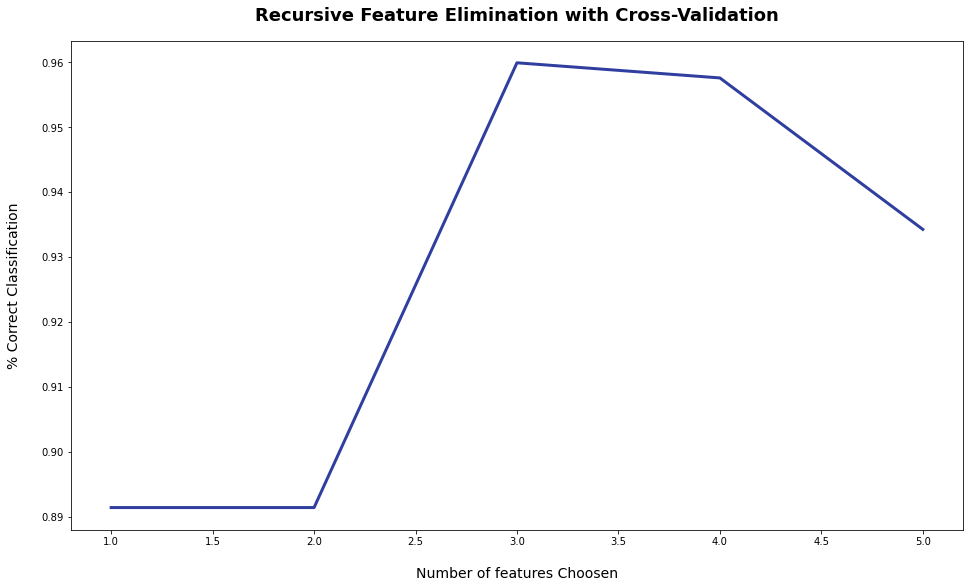

In [49]:
plt.figure(figsize=(16, 9))

plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features Choosen', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [50]:
rfecv.estimator_.feature_importances_

array([0.650952 , 0.2982751, 0.0507729])

In [51]:
# Selected Features
rfecv.support_

array([ True,  True, False,  True, False])

In [52]:
selected_features = [each_feature for each_feature, status in zip(X.columns, rfecv.support_) if status == True]
print('Selected Features:\n', *selected_features, sep="\n")

Selected Features:

rel_compactness
wall_area
glazing_area


In [53]:
for feature, value in zip(X.columns, rfecv.ranking_):
    print(feature, "--- (", value, ")")

rel_compactness --- ( 1 )
wall_area --- ( 1 )
orientation --- ( 3 )
glazing_area --- ( 1 )
glazing_area_dist --- ( 2 )


In [54]:
imp_values = list(rfecv.estimator_.feature_importances_)
imp_values

[0.6509520012361241, 0.2982751010653679, 0.050772897698508]

In [55]:
imp_values.reverse()
imp_values

[0.050772897698508, 0.2982751010653679, 0.6509520012361241]

In [56]:
importance = []
for value in fit.support_:
    if value == True:
        importance.append(imp_values.pop())
    else:
        importance.append(0)

importance

[0.6509520012361241, 0.2982751010653679, 0, 0.050772897698508, 0]

In [57]:
plotting_data = pd.DataFrame({'Features': X.columns, 'Importance':importance}, index=X.columns)
plotting_data

,Features,Importance
rel_compactness,rel_compactness,0.650952
wall_area,wall_area,0.298275
orientation,orientation,0.000000
glazing_area,glazing_area,0.050773
glazing_area_dist,glazing_area_dist,0.000000


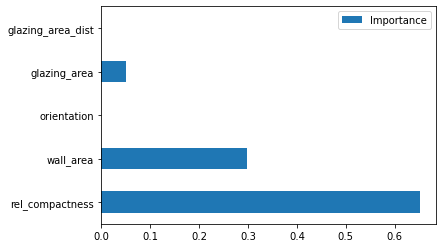

In [58]:
plotting_data.plot.barh()

### Fit the Model

In [59]:
seed = 7

In [60]:
n_estimators = len(X)

In [61]:
model.fit(X, target)

ExtraTreesRegressor()

### Evaluate the Model

In [62]:
kfold = model_selection.RepeatedKFold(n_splits=n_estimators, n_repeats=10, random_state=seed)

In [63]:
cv_results = model_selection.cross_val_score(model, X, target, cv=10)

In [64]:
cv_results

array([0.91488363, 0.97997898, 0.9383246 , 0.96252841, 0.98591357,
       0.93732657, 0.96219915, 0.95316227, 0.92324001, 0.95668327])

In [65]:
msg = "%s: %f (%f)" % ("ExtraTreesRegressor", cv_results.mean(), cv_results.std())

In [66]:
msg

'ExtraTreesRegressor: 0.951424 (0.021851)'

## Summary

For Y1 (Heating Load)
> 1. 'surface_area', 'roof_area' and 'overall_height' were top 3 selected for predicting 'heating_load'.
> 2. The accuracy of prediction by ExtraTreeRegressor is ~97%.

For Y2 (Cooling Load)
> 1. 'rel_compactness', 'wall_area' and 'glazing_area' were top 3 selected for predicting 'cooling_load'.
> 2. The accuracy of prediction by ExtraTreeRegressor is ~95%.

The results of this study support the feasibility of using machine learning tools to estimate building parameters as a convenient and accurate approach, as long as the requested query bears resemblance to the data actually used to train the mathematical model in the first place.

(Courtesy: https://www.semanticscholar.org/paper/Accurate-quantitative-estimation-of-energy-of-using-Tsanas-Xifara/719e65379c5959141180a45f540f707d583b8ce2)

                                               Prepared by J.Haripriya